# Spam/Ham text Detection


In this exercise, I will be using NLP(Natural Language Processing) algorithms to classify text messages into spam messages or ham messages. I would be using a dataset from the UCI datasets! This dataset is already located in the folder. The file I am  using contains a collection of more than 5 thousand SMS phone messages.

Lets start by importing necessary libraries and reading in the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
messages = pd.read_csv('SMSSpamCollection', sep='\t',
                           names=["label", "message"])

In [3]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Using groupby to divide the dataset by label


In [5]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

Lets check out the length of each sms, so we can get a deeper insight of the dataset

In [6]:
messages['length'] = messages['message'].apply(len)

In [7]:
messages

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

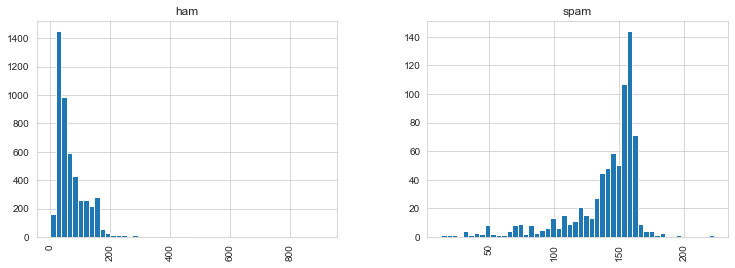

In [8]:
sns.set_style('whitegrid')
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

From the plot above, one can clearly see theres a trend in the length of texts as regards to spam and ham. Spam messages tend to have more characters than ham. I also noticed theres a message reaching up to 900 under ham, lets check that out

In [9]:
messages['length'].max()

910

i guess its some kind of love letter, how cute lol

In [10]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In order not to leak data, i would be splitting my dataset at this point into the training and the test set, so that i can carry out all the text processes on the train and predict on the test

In [11]:
from sklearn.model_selection import train_test_split


In [55]:
X_train, X_test, y_train, y_test = train_test_split(messages['message'], messages['label'], test_size=0.3, random_state=42)

In [56]:
Train = pd.DataFrame(data = X_train, columns=['message'])
Train['label'] = y_train
Train = Train.reset_index()
Train.drop('index', axis = 1, inplace =True)

In [57]:
Train

,message,label
0,Quite late lar... Ard 12 anyway i wun b drivin...,ham
1,on a Tuesday night r u 4 real,ham
2,Go chase after her and run her over while she'...,ham
3,"G says you never answer your texts, confirm/deny",ham
4,Still work going on:)it is very small house.,ham
...,...,...
3895,"Hi, wlcome back, did wonder if you got eaten b...",ham
3896,"Sorry, I'll call later",ham
3897,Prabha..i'm soryda..realy..frm heart i'm sory,ham
3898,Nt joking seriously i told,ham


In [58]:
Train.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      3377   3190                             Sorry, I'll call later   19
spam      523    481  Loan for any purpose £500 - £75,000. Homeowner...    3

In [59]:
Test = pd.DataFrame(data = X_test, columns=['message'])
Test['label'] = y_test
Test = Test.reset_index()
Test.drop('index', axis = 1, inplace =True)

In [60]:
Test

,message,label
0,Squeeeeeze!! This is christmas hug.. If u lik ...,ham
1,And also I've sorta blown him off a couple tim...,ham
2,Mmm thats better now i got a roast down me! i...,ham
3,Mm have some kanji dont eat anything heavy ok,ham
4,So there's a ring that comes with the guys cos...,ham
...,...,...
1667,"Hello, my boytoy! I made it home and my consta...",ham
1668,FREE entry into our £250 weekly comp just send...,spam
1669,Aiyo u so poor thing... Then u dun wan 2 eat? ...,ham
1670,"You have won ?1,000 cash or a ?2,000 prize! To...",spam


In [61]:
Test.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      1448   1409                             Sorry, I'll call later   11
spam      224    213  PRIVATE! Your 2004 Account Statement for 07742...    2

# Text Preprocessing

To achieve the goal of classifying these sms, we need to feed it into our model and as usual, machine learning models only understand numbers, whereas the dataset is in string format. There are actually many methods to convert a corpus to a vector format. The simplest is the the bag-of-words approach, where each unique word in a text will be represented by one number. 

The first step would be to remove all punctuations and all common nouns and pronouns which machine learning refers to as stopwords. This process is called tokenisation(selecting only useful words we need)

In [62]:
import string
from nltk.corpus import stopwords

I will create a function that takes a string of text, removes all punctuations, remove all stopwords and returns a list of the cleaned text

In [63]:
def text_process(mess):
    
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords and return the cleaned text
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

Lets see if it works

In [64]:
example = 'This is an example! Notice: there are punctuations.'
example

'This is an example! Notice: there are punctuations.'

In [65]:
text_process(example)

['example', 'Notice', 'punctuations']

Currently, we have the messages as lists of tokens. Now we'll convert each message, represented as a list of tokens above, into a vector that machine learning models can understand. We'll do that using the bag-of-words model.



We will first use SciKit Learn's CountVectorizer. This model will convert a collection of text documents to a matrix of token counts. We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message. Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a Sparse Matrix.

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

In [67]:
bow_transformer = CountVectorizer(analyzer=text_process)

Note that whatever is done to the Train set would also have to be done to the Test set

In [68]:
messages_bow = bow_transformer.fit_transform(Train['message'])

In [69]:
test_messages_bow = bow_transformer.transform(Test['message'])

In [70]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (3900, 9369)
Amount of Non-Zero occurences:  35620


In [71]:
print('Shape of Sparse Matrix: ', test_messages_bow.shape)
print('Amount of Non-Zero occurences: ', test_messages_bow.nnz)

Shape of Sparse Matrix:  (1672, 9369)
Amount of Non-Zero occurences:  12656


Now we have our bag of words, next would be to weigh and normalize the term. This can be done with TF-IDF, using scikit-learn's TfidfTransformer

In [72]:
from sklearn.feature_extraction.text import TfidfTransformer


In [73]:
tfidf_transformer = TfidfTransformer()

In [74]:
messages_tfidf = tfidf_transformer.fit_transform(messages_bow)
print(messages_tfidf.shape)

(3900, 9369)


In [75]:
test_messages_tfidf = tfidf_transformer.fit_transform(test_messages_bow)
print(test_messages_tfidf.shape)

(1672, 9369)


# Training a model

Now all the messages are represented as vectors, we can finally train our spam/ham classifier. Naive Bayes classifier is a good choice for this. we train on our training set and predict on the test set, then evaluate the performance.

In [76]:
from sklearn.naive_bayes import MultinomialNB

In [77]:
MNB = MultinomialNB()

In [78]:
MNB.fit(messages_tfidf, Train['label'])

MultinomialNB()

In [80]:
Predictions = MNB.predict(test_messages_tfidf)

In [83]:
from sklearn.metrics import classification_report,confusion_matrix

In [82]:
print(classification_report(Predictions,Test['label']))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1506
        spam       0.74      1.00      0.85       166

    accuracy                           0.97      1672
   macro avg       0.87      0.98      0.92      1672
weighted avg       0.97      0.97      0.97      1672



In [84]:
print(confusion_matrix(Predictions,Test['label']))

[[1448   58]
 [   0  166]]


This is the end of this exercise and the result is quite impressive. Thankyou